In [114]:
import os
import sys
import cv2
import numpy as np
import matplotlib.pyplot as plt

# transforming cat.png gray_scale and blightness

In [9]:
# load ficture
img_cat = cv2.imread('C:\ComputerVision_master\images\cat.png', cv2.IMREAD_GRAYSCALE)

# check ficture load
if img_cat is None :
    print('Image load failed!')
    sys.exit()


img_cat = cv2.add(img_cat,30,-30)
cv2.imshow('img_cat',img_cat)

cv2.waitKey(0)
cv2.destoryAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'

# filping cat.png

In [8]:
# load ficture
img_cat = cv2.imread('C:\ComputerVision_master\images\cat.png', cv2.IMREAD_GRAYSCALE)

# check ficture load
if img_cat is None :
    print('Image load failed!')
    sys.exit()

#setting height, width
h, w = img_cat.shape[0:2]


# check the type and shape
img_cat_flip = np.zeros(img_cat.shape, img_cat.dtype)
print("origin type:",img_cat.dtype)
print("origin shape:",img_cat.shape)
print("img cat flip type:",img_cat_flip.dtype)
print("img cat filp shape:",img_cat_flip.shape)

for j in range(h) :
    img_cat_flip[j, :(w-1)] = img_cat[h-1-j, :(w-1)]

cv2.imshow('img_cat',img_cat)
cv2.imshow('img_cat_flip',img_cat_flip)

cv2.waitKey()
cv2.destroyAllWindows()

origin type: uint8
origin shape: (192, 256)
img cat flip type: uint8
img cat filp shape: (192, 256)


# segregating red chennel

In [4]:
#load ficture
img_lenna = cv2.imread('C:\ComputerVision_master\images\lenna.bmp')

#split
b,g,r = cv2.split(img_lenna)

#setting value
r = cv2.multiply(r,0)
#cv2.imshow('green', g)
#cv2.imshow('red', r)

#merge
bg_lenna = cv2.merge((b,g,r))

#show
cv2.imshow('bg_lenna',bg_lenna)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
img_1 = cv2.imread('C:\ComputerVision_master\images\man1.jpg')
img_1 = cv2.resize(img_1,(300,300))
img_2 = cv2.imread('C:\ComputerVision_master\images\man2.jpg')
img_2 = cv2.resize(img_2,(300,300))

dst1 = cv2.add(img_1, img_2)

a = 0.5
dst2 = cv2.addWeighted(img_1,1,img_2,a-1,0)

cv2.imshow('add',dst1)
cv2.imshow('addWeighted',dst2)

cv2.waitKey()
cv2.destroyAllWindows()

In [35]:
isDragging = False
sx,sy,w,h = -1,-1,-1,-1
blue, red = (255,0,0),(0,0,255)

def onMouse(event, x, y, flags, param) :
    global isDragging, sx, sy, image
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        sx= x
        sy= y
    elif event == cv2.EVENT_MOUSEMOVE :
        if isDragging :
            img_draw = image.copy()
            cv2.rectangle(img_draw,(sx,sy),(x,y),blue,2)
            cv2.imshow('img',img_draw)
    elif event == cv2.EVENT_LBUTTONUP :
        if isDragging :
            isDragging = False
            w = x -sx
            h = y - sy
            if w > 0 and h > 0 :
                img_draw = image.copy()
                cv2.rectangle(img_draw, (sx,sy), (x,y), red, 2)
                cv2.imshow('img',img_draw)
                roi = image[sy:sy+h, sx:sx+w]
                cv2.imshow('cropped',roi)
                cv2.moveWindow('cropped',0,0)
                cv2.imwrite('C:\ComputerVision_master\images\cropped.png',roi)
            else :
                cv2.imshow('img',image)
                print('drag sholud start from left-top side')


In [36]:
image = cv2.imread('C:\ComputerVision_master\images\son.jpg')
cv2.imshow('img',img_soccer)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

drag sholud start from left-top side


In [112]:
img = cv2.imread('C:\ComputerVision_master\images\cat.png')
height, width = img.shape[:2]
img2 = cv2.resize(img,(width*4, height*4), interpolation = cv2.INTER_AREA)
M = cv2.getRotationMatrix2D(((width-1)*2, (height-1)*2),180, 1)
des2 = cv2.warpAffine(img2,M,(width*4,height*4))

cv2.imshow('img',des2)
cv2.waitKey()
cv2.destroyAllWindows()

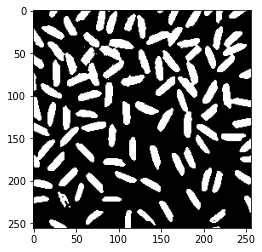

In [167]:
img = cv2.imread('rice_2.bmp',cv2.IMREAD_GRAYSCALE)
img = cv2.medianBlur(img,3)
ret,th1 = cv2.threshold(img,119,255,cv2.THRESH_BINARY)
plt.imshow(th1,'gray')
plt.show()

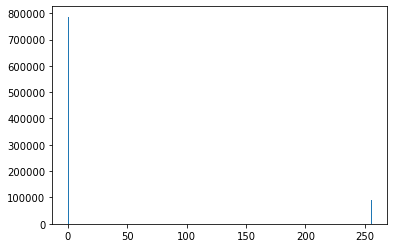

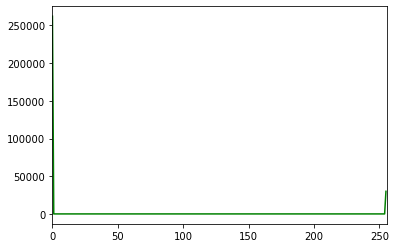

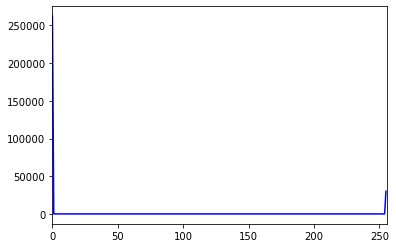

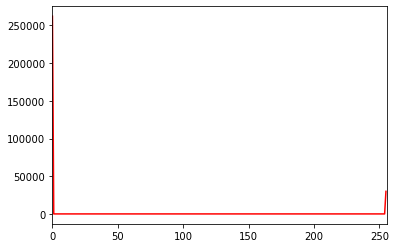

In [179]:
img = cv2.imread('C:\ComputerVision_master\images\OpenCV_Logo.png')

if img is None :
    print('Image load failed!')
    sys.exit()

plt.hist(img.ravel(),256,[0,256])
plt.show()

b,g,r = cv2.split(img)
img = [b,g,r]

color ={'b','g','r'}
for i,col in enumerate(color):
    hist, bins = np.histogram(img[i].ravel(),256,[0,256])
    plt.plot(hist,color = col)
    plt.xlim([0,256])
    plt.show()